## Resampling

Another approach, not included in our textbook, is designed to exploit the situation we now frequently find of having lots of data. The idea is this:  Given a large set of data we can experiment on the variation of our test statistic by sampling from the data itself. This approach is introducing some randomness in how the sampling is done, and it captures the information the data has about the variation. It relies on having enough data to give a large domain of resamples.





In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [9]:
baseball_url = 'https://drive.google.com/uc?export=download&id=1-4lEGbDkQi8Wy6h940tpbiMmcfQFxq8E'
baseball = pd.read_csv(baseball_url)
baseball

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71
...,...,...,...,...,...,...
1029,Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
1030,Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
1031,Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19
1032,Randy_Keisler,STL,Relief_Pitcher,75,190.0,31.01


In [10]:
pos = set(baseball.loc[:, 'Position'])

# We are going to recode the position feature to be 'Pitcher' or 'NotPitcher'. It is convenient to do this using
# a dictionary. If you are interested this is the Python for doing this kind of work.

# if not you can just ignore this

recode_pitch = { x:'Pitcher' for x in pos if 'Pitcher' in x }
# First for any position which has the word Pitcher, we recode that to just be Pitcher.

recode_pitch.update({ x:'NotPitcher' for x in pos if not 'Pitcher' in x})
# Then recode the ones that do not use the word Pitcher

# Python lets us update dictionaries.
recode_pitch

{'Relief_Pitcher': 'Pitcher',
 'Starting_Pitcher': 'Pitcher',
 'Shortstop': 'NotPitcher',
 'Designated_Hitter': 'NotPitcher',
 'Catcher': 'NotPitcher',
 'Second_Baseman': 'NotPitcher',
 'Outfielder': 'NotPitcher',
 'Third_Baseman': 'NotPitcher',
 'First_Baseman': 'NotPitcher'}

In [11]:
# So now fix the column
baseball.loc[:, 'Position'] = baseball.loc[:, 'Position'].map(recode_pitch)

<AxesSubplot:xlabel='Height(inches)', ylabel='Count'>

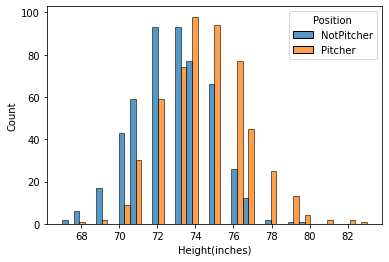

In [12]:
# Seaborn is a data visualization package that is useful for plotting complicated data 
# in this case we can put the histograms of the heights of the players side by side by position

sns.histplot(data = baseball, x='Height(inches)', hue='Position', multiple='dodge')

So a very natural proposition is then that Pitchers are taller on the average than non-Pitchers (there are some physiological reasons that this seems reasonable). Let's test this hypothesis using the techniques we've been learning. First we note that the sample sizes are nice and large:

In [13]:
baseball = baseball.loc[:, ['Position', 'Height(inches)', 'Weight(pounds)', 'Age']]
baseball.groupby('Position').count()

,Height(inches),Weight(pounds),Age
Position,,,
NotPitcher,498,498,498
Pitcher,536,535,536


### As a Hypothesis Test

So let's quickly run this as a hypothesis test.

In [14]:
baseball.groupby('Position').mean()

,Height(inches),Weight(pounds),Age
Position,,,
NotPitcher,72.815261,198.997992,29.083414
Pitcher,74.516791,204.194393,28.414590


In [15]:
Ybar1 = 72.82
Ybar2 = 74.52
n1= 498
n2 = 536

In [16]:
baseball.groupby('Position').std()

,Height(inches),Weight(pounds),Age
Position,,,
NotPitcher,2.053120,19.653794,4.286443
Pitcher,2.225531,21.886744,4.330693


In [17]:
S1 = 2.05
S2 = 2.23

In [18]:
Sp = np.sqrt( ((n1-1)*S1**2 + (n2-1)*S2**2 )/(n1+n2-2) )
Sp

2.145200158710192

In [19]:
# We will go right to the normal distribution because the degrees of freedom are quite large

from scipy.stats import norm

z_star = (Ybar1 - Ybar2) / Sp / np.sqrt(1/n1 + 1/n2) 
z_star

-12.732623514616584

In [20]:
# This is quite small, but just to finish the likliehood that the value of Z is this or smaller is:

norm.cdf(z_star)

1.9476347907083775e-37

Our conclusion is that it is very unlikely that the mean height of pitchers is the same as the mean height of non-pitchers.

## Random Sampling - Our Hypothesis: The mean height of pitchers at 74.5 inches is taller than non-Pitchers

The null hypothesis is that the sample of Pitchers being taller was just a result of randomly choosing 536 players out of 1034 ballplayers and just ending up with the taller ones. To see if this could actually be the case, what we are going to do is select sets of 536 ball players from our sample over and over computing the mean each time, and see how often we end up with a mean of 74.5 inches or more.

In [21]:
import random

In [22]:
# Let's make this a function so we don't have to retype it all the time

size = 536

def experiment(N, s = size, population = list(baseball.loc[:, 'Height(inches)'])):
    # N is the number of times to run the experiment
    # s is a variable that will let us change the size of the sample to pull, the default value size is the number
    # of petitions that Nixon received

    result = pd.DataFrame([], columns = ['Mean Heights']) # Make a dataframe to catalogue the results
    # Note I drop the size, because every sample will have the same size.
    
    for k in range(N):
        
        # random.choices(population, size)  
        # use this command if we are sampling from the population with replacement
    
        sample = np.mean(random.sample(population, s))
        # use this command if we are sampling from the population without replacement
    
        row = pd.DataFrame([sample], 
                       index = ['Mean Heights']).transpose()
    
        result = result.append(row)
    
    return result.reset_index().iloc[:, 1:]

<AxesSubplot:xlabel='Mean Heights', ylabel='Count'>

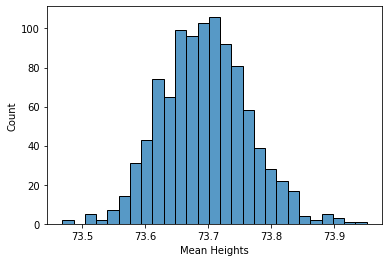

In [23]:
result = experiment(1000)
sns.histplot(data=result, x='Mean Heights')

<AxesSubplot:xlabel='Mean Heights'>

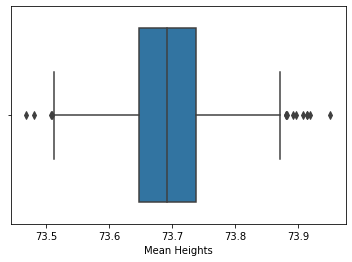

In [24]:
sns.boxplot(data=result, x='Mean Heights')

And we see that it never happened!  Which is actually remarkable given that there are many more pitchers than not pitchers.

## Let's do the same operation with Age

And at the same time look at the Median Age!

In [25]:
baseball.groupby('Position').median()

,Height(inches),Weight(pounds),Age
Position,,,
NotPitcher,73,200.0,28.38
Pitcher,74,201.0,27.52


In [26]:

# Let's make this a function so we don't have to retype it all the time

size = 536

def experiment(N, s = size, population = list(baseball.loc[:, 'Age'])):
    # N is the number of times to run the experiment
    # s is a variable that will let us change the size of the sample to pull, the default value size is the number
    # of petitions that Nixon received

    result = pd.DataFrame([], columns = ['Median Age']) # Make a dataframe to catalogue the results
    # Note I drop the size, because every sample will have the same size.
    
    for k in range(N):
        
        # random.choices(population, size)  
        # use this command if we are sampling from the population with replacement
    
        sample = np.median(random.sample(population, s))
        # use this command if we are sampling from the population without replacement
    
        row = pd.DataFrame([sample], 
                       index = ['Median Age']).transpose()
    
        result = result.append(row)
    
    return result.reset_index().iloc[:, 1:]

<AxesSubplot:xlabel='Median Age', ylabel='Count'>

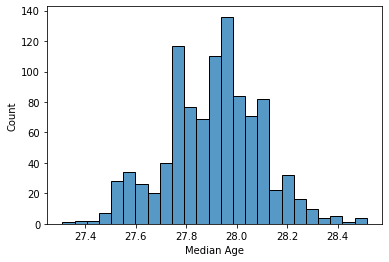

In [27]:
result = experiment(1000)
sns.histplot(data=result, x='Median Age')

<AxesSubplot:xlabel='Median Age'>

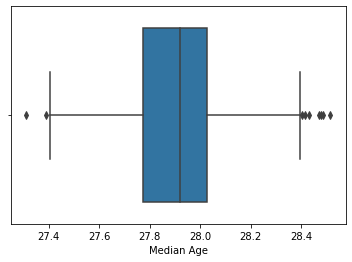

In [28]:
sns.boxplot(data=result, x='Median Age')

And we see that a Median Age of 27.52 or less fits into the first tail of the experiment, and so there is a small proportion of times we expect to see that result come out. We can compute the exact proportion by:

In [29]:
sum(result.loc[:, 'Median Age'] <= 27.52 )/1000

0.018

Note that we do not have other tools for studying the Median Age of the sample unless we know the underlying distribution the sample is pulled from. We can guess that the underlying sample here is normal, and we also would suspect that we would have a robust test, however resampling gives us a method of studying the same question without having to worry about those assumptions.

So what is the catch?  Well we need to know that the sample we do have is random and representative. For this problem there is not much to be worried about, but we would want to be especially careful if one of our populations is much smaller than the other.

Note that above we sampled from the players without replacement. Another approach would be to sample from the set with replacement - this would be appropriate if for example we were just studying a single population.

# Returning to Correlations: Linear Statistical Models

So it is time for us to return to multivariate probability and revisit the study of these distributions with the tools we have now. Note this is a big topic and we will not have time explore it completely. The courses STAT 406 and STAT 411 both get into more extensive results around the modeling of data.

The basic problem is that we are presented with a sample from a multivariate distribution as pairs of $(x, y)$. For which we are going to think of the $y$ as a dependent variable and $x$ as an indepent variable. We have perhaps observed some correlation between the $x$ and $y$. 

For example:



In [41]:
# There is a missing value that will cause a problem in what follows

baseball = baseball.loc[pd.notna(baseball.loc[:, 'Weight(pounds)'])]

In [42]:
baseball

,Position,Height(inches),Weight(pounds),Age
0,NotPitcher,74,180.0,22.99
1,NotPitcher,74,215.0,34.69
2,NotPitcher,72,210.0,30.78
3,NotPitcher,72,210.0,35.43
4,NotPitcher,73,188.0,35.71
...,...,...,...,...
1029,Pitcher,73,190.0,25.08
1030,Pitcher,74,180.0,25.73
1031,Pitcher,75,205.0,25.19
1032,Pitcher,75,190.0,31.01


<AxesSubplot:xlabel='Weight(pounds)', ylabel='Height(inches)'>

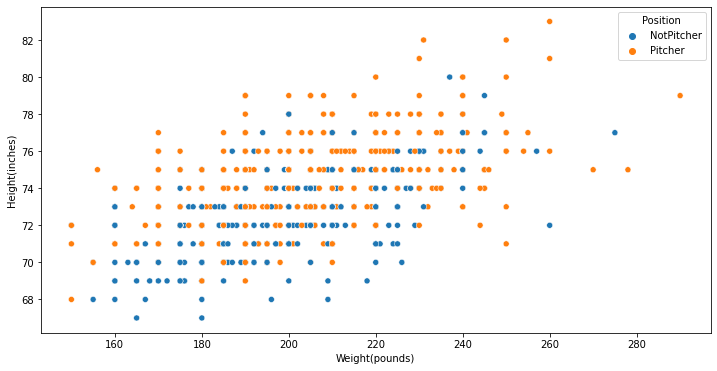

In [33]:
plt.figure(figsize = (12, 6))
sns.scatterplot(data=baseball, x='Weight(pounds)', y='Height(inches)', hue='Position')

It is not surprising, but it appears that there is some correlation between a baseball players Weight and Height.

We would like to model this relationship with some $y = f(x)$, i.e. *given a players weight, we would produce a value for their height.*

Notice that in this case, it is clearly hopeless. There are a number of heights for which there are multiple weights from players. Thus whatever the relationship is, it cannot be described completely by a function.

What we would like to do then, in a very statistical way of thinking about it, is the best that we can. I.e. to model the relationship between $y$ and $x$ with some function $f(x)$ and to then describe the extent to which we expect the model to be accurate. 

Note that the actual distribution changes as we vary $x$.

## Linear Regression

So as we often do in mathematics, in our quest to develop some tools for arbitrary functions, we start with the simplest ones first. We wish to find a $\beta_0$ and a $\beta_1$ such that

$$ y = \beta_0 + \beta_1 x $$ 

gives a good approximation of the relationship between $x$ and $y$ for our population. **What do we mean by good?**

Well the exact relationship is:  $$ y = \beta_0 + \beta_1 x + \epsilon $$ for some error term $\epsilon$ which is a random variable capturing the error of our linear model. If the linear model is a good approximation the $\epsilon$ should be something for which we have some control/understanding. 

In other words, the correct $\beta_0$ and $\beta_1$ are the choices which minimize to some extent the $\epsilon$.

### Least Squares

Not surprisingly one of the most common metrics for us to use in this minimization is the sum the square errors of our model:

Given a collection of data points:  $$ \left\{ (x_i, y_i) \right\} $$ let $$ \hat{y}_i = \beta_0 + \beta_1 x_i $$ be the $y$ values predicted by the linear model with $\beta_0$ and $\beta_1$ parameters. Then the sum of square errorsis:

$$ \mbox{SSE} = \sum_{i=1}^n (y_i - \hat{y}_i)^2 $$

and our estimate of the $\beta_0$ and $\beta_1$ are the values that minimize SSE. This is a Calculus 3 minimization problem:  You are looking for the location where $\frac{\partial \mbox{SSE}}{\partial \beta_j} = 0 $. However it can also be formulated as a Linear Algebra problem. In either case one find:

$$ \hat{\beta}_1 = \frac{ \sum (x_i - \bar{x} )(y_i - \bar{y}) }{\sum (x_i - \bar{x})^2 } $$

and $\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x} $.

Note that because we are working from a sample of a multivariate distribution $(X, Y)$ the values we get depend on the sample and so at best are estimates of the true values: 

$$ Y = \beta_0 + \beta_1 X + \epsilon $$


In [37]:
xbar = baseball.loc[:, 'Weight(pounds)'].mean()
ybar = baseball.loc[:, 'Height(inches)'].mean()
xbar, ybar

(201.6892545982575, 73.6972920696325)

In [45]:
Sxy = sum( [ (baseball.loc[i, 'Weight(pounds)'] - xbar)*(baseball.loc[i, 'Height(inches)'] - ybar) for i in baseball.index ] )
Sxx = sum( [ (baseball.loc[i, 'Weight(pounds)'] - xbar)**2 for i in baseball.index ])
beta1 = Sxy / Sxx
beta0 = ybar - beta1*xbar
beta0, beta1

(61.910943433988855, 0.05843815853809729)

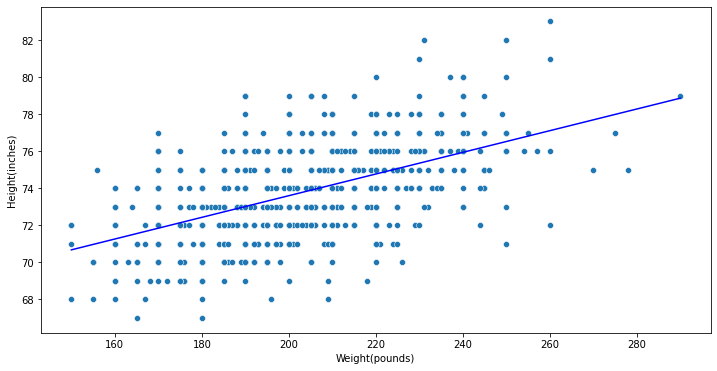

In [46]:
plt.figure(figsize = (12, 6) )
sns.scatterplot(data=baseball, x='Weight(pounds)', y = 'Height(inches)')
x = np.linspace(150, 290, 100)
y = beta0 + beta1*x
plt.plot(x, y, 'b-')

To get a handle on how good our estimates are, we consider the $x_i$ fixed and the $Y_i$ as a random variable:  $$Y_i = \beta_0 + \beta_1 x_i + \epsilon$$  If the $\epsilon$ is normally distributed with population variance $\sigma^2$ and we can find the following results:

- The $\hat{\beta}_j$ estimators are normally distributed.

- $\hat{\beta_1}$ is an unbiased estimator of $\beta_1$:  $$ E( \hat{\beta_1}) = \beta_1$$ 

- while it has variance given by:  $$ V(\hat{\beta_1}) = \frac{\sigma^2}{S_{xx}} $$  where $ S_{xx} = \sum (x_i - \bar{x})^2 $.

- $\hat{\beta_0}$ above was choosen specifically so that it is an unbiased estimator of $\beta_0$. 

- The variance meanwhile is: 

$$ V(\hat{\beta_0}) = \sigma^2 \frac{\sum x_i^2}{n S_{xx} } $$

- Finally there is a relationship between $\hat{\beta_0}$ and $\hat{\beta_1}$ which is not surprising:

$$ \mbox{Cov}(\hat{\beta_0}, \hat{\beta_1}) = \frac{-\bar{x} \sigma^2}{S_{xx}} $$



### Estimates for Y Variance

It is natural to use the errors of our estimated model as an estimate for the population variance. However we expect degrees of freedom to be an issue, and in particular the $Y_i$ were used in computing the estimate $\hat{\beta}_j$ used in $\hat{Y_i}$.

We can show that 

$$ S^2 = \frac{1}{n-2} \sum (Y_i - \hat{Y_i} )^2 $$

is an unbiased estimate for $\sigma^2$. 

More generally you will use $n-d$ where $d$ is the number of parameters being used in our model. As we saw with the sample variance before, for large values of $n$ the difference is negligible. One way to think of this though is to recognize that with only two data values $n=2$ we would not have enough information to understand any sort of variation in the $\beta_j$.

In [49]:
baseball.count()

Position          1033
Height(inches)    1033
Weight(pounds)    1033
Age               1033
dtype: int64

In [56]:
# Baseball example:

S2 = 1/(1031) * sum( [ (baseball.loc[i, 'Height(inches)'] - beta0 - beta1*baseball.loc[i, 'Weight(pounds)'])**2 for i in baseball.index ])

Vbeta1 = S2/ Sxx

Vbeta0 = S2 *sum( [ baseball.loc[i, 'Weight(pounds)']**2 for i in baseball.index]) / (1033 * Sxx )

Vbeta0, Vbeta1

(0.3452360100312425, 8.396068197272493e-06)

In [58]:
# and the correlation

Covbeta0beta1 = - xbar * S2/Sxx
Covbeta0beta1

-0.0016933967362640248

### Hypothesis Tests and Confidence Intervals

All of this then means, with the assumption that $\epsilon$ is normally distributed, that we can use our tools to construct confidence intervals or run hypothesis tests on these values. 

#### Example 1: Confidence Interval 

Construct a 99% confidence inteval for $\beta_1$ and $\beta_0$:



In [59]:
from scipy.stats import t

In [62]:
t_alpha = t.ppf(0.995, 1032)

In [66]:
beta1 - t_alpha * np.sqrt(Vbeta1 / 1032), beta1 + t_alpha * np.sqrt(Vbeta1 / 1032)

(0.058205392770293476, 0.05867092430590111)

In [67]:
beta0 - t_alpha * np.sqrt(Vbeta0 / 1032), beta0 + t_alpha * np.sqrt(Vbeta0 / 1032 )

(61.86374374077432, 61.95814312720339)

#### Example 2: Hypothesis Test

Note that the relationship between height and weight for Pitchers and non-Pitchers appears to be slightly different:

<AxesSubplot:xlabel='Weight(pounds)', ylabel='Height(inches)'>

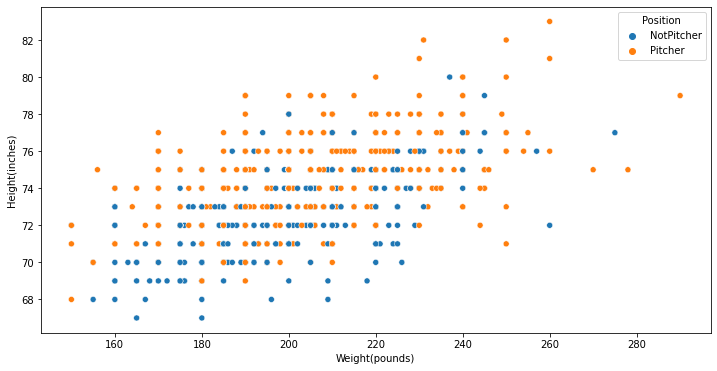

In [68]:
plt.figure(figsize = (12, 6))
sns.scatterplot(data=baseball, x='Weight(pounds)', y='Height(inches)', hue = 'Position')

In [76]:
# For what follows it will be helpful to just divide the samples into two sets:

pitchers = baseball.loc[baseball.loc[:, 'Position']=='Pitcher']
pitchers = [ (baseball.loc[i, 'Weight(pounds)'], baseball.loc[i, 'Height(inches)']) for i in pitchers.index ]

not_pitchers = baseball.loc[baseball.loc[:, 'Position']!= 'Pitcher']
not_pitchers = [ (baseball.loc[i, 'Weight(pounds)'], baseball.loc[i, 'Height(inches)'] ) for i in not_pitchers.index]

In [79]:
# These are now both arrays of tuples and we can access the entries via:

pitchers[5][0]

230.0

In [89]:
# Find the estimated linear regression coefficients for each data set.

n_pitch = len(pitchers)

# For pitchers
xbar = np.mean( [pitchers[i][0] for i in range(n_pitch) ] )
ybar = np.mean( [pitchers[i][1] for i in range(n_pitch) ] )

Sxy_pitch = sum( [(pitchers[i][0] - xbar)*(pitchers[i][1] - ybar) for i in range(n_pitch)] )
Sxx_pitch = sum( [(pitchers[i][0] - xbar)**2 for i in range(n_pitch) ]) 
beta1_pitch = Sxy_pitch / Sxx_pitch

beta0_pitch = ybar - beta1_pitch * xbar
beta0_pitch, beta1_pitch



(64.5602913745553, 0.04878294565022251)

In [90]:
# For Non Pitchers

n_not = len(not_pitchers)
xbar = np.mean( [not_pitchers[i][0] for i in range(n_not)])
ybar = np.mean( [not_pitchers[i][1] for i in range(n_not) ])

Sxy_not = sum( [ (not_pitchers[i][0] - xbar)*(not_pitchers[i][1] - ybar) for i in range(n_not) ])
Sxx_not = sum( [ (not_pitchers[i][0] - xbar)**2 for i in range(n_not) ])
beta1_not = Sxy_not / Sxx_not

beta0_not = ybar - beta1_not * xbar
beta0_not, beta1_not

(60.574573102146985, 0.061511615373515946)

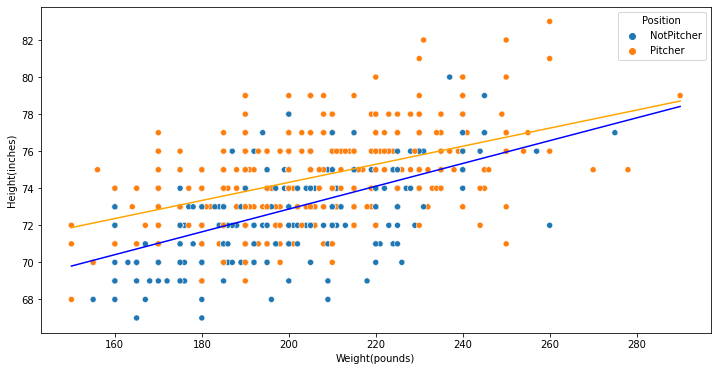

In [98]:
plt.figure(figsize = (12, 6))
sns.scatterplot(data=baseball, x='Weight(pounds)', y='Height(inches)', hue = 'Position')
x = np.linspace(150, 290, 100)
y = beta0_pitch + beta1_pitch*x
plt.plot(x, y, '-', color = 'orange')

y = beta0_not + beta1_not*x
plt.plot(x, y, 'b-')

Is there sufficient evidence that the linear coefficient is different in the two populations?

Following our previous work, the difference of these two normal variables is itself normal:

$$ Z = \frac{\hat{\beta}_1 - \hat{\beta}_2 - (\beta_1 - \beta_2) }{ \sqrt{ \frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2} } } $$

However note that we do not have exactly values for $\sigma_1^2$ and $\sigma_2^2$.  What we do have are the estimates:

In [101]:
S2_pitch = 1/(n_pitch - 2) * sum( [ (pitchers[i][1] - beta0_pitch - beta1_pitch * pitchers[i][0] )**2 for i in range(n_pitch) ])
S2_pitch

Vbeta1_pitch = S2_pitch / Sxx_pitch
Vbeta1_pitch

1.4923843600797097e-05

In [103]:
S2_not = 1/(n_not - 2) * sum( [ (not_pitchers[i][1] - beta0_not - beta1_not * not_pitchers[i][0] )**2 for i in range(n_not) ])

Vbeta1_not = S2_not / Sxx_not
Vbeta1_not

1.4373201208678467e-05

The sample sizes are large enough we can proceed to use these as estimates for the variance. For smaller samples we would want to use a T-distribution instead, which would necissitate an assumption like the two variances are equal and then using a pooled variance.

In [104]:
# We compute the z_star for our null hypothesis

z_star = (beta1_pitch - beta1_not) / np.sqrt( Vbeta1_pitch/n_pitch + Vbeta1_not / n_not )
z_star

-53.42859372210531

And so we see that the probability that the true coefficients are the same and these values resulted from random sampling is negligible (its not even worth computing our z_star is so small). We can confidently reject the null hypothesis and declear the coefficients and thus the relationship between height and weight for the two populations to be different.